In [ ]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 54.6 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
results = model("/content/drive/My Drive/crowd.png")



image 1/1 /content/drive/My Drive/crowd.png: 384x640 31 persons, 1 bird, 6.6ms
Speed: 2.1ms preprocess, 6.6ms inference, 13.9ms postprocess per image at shape (1, 3, 384, 640)


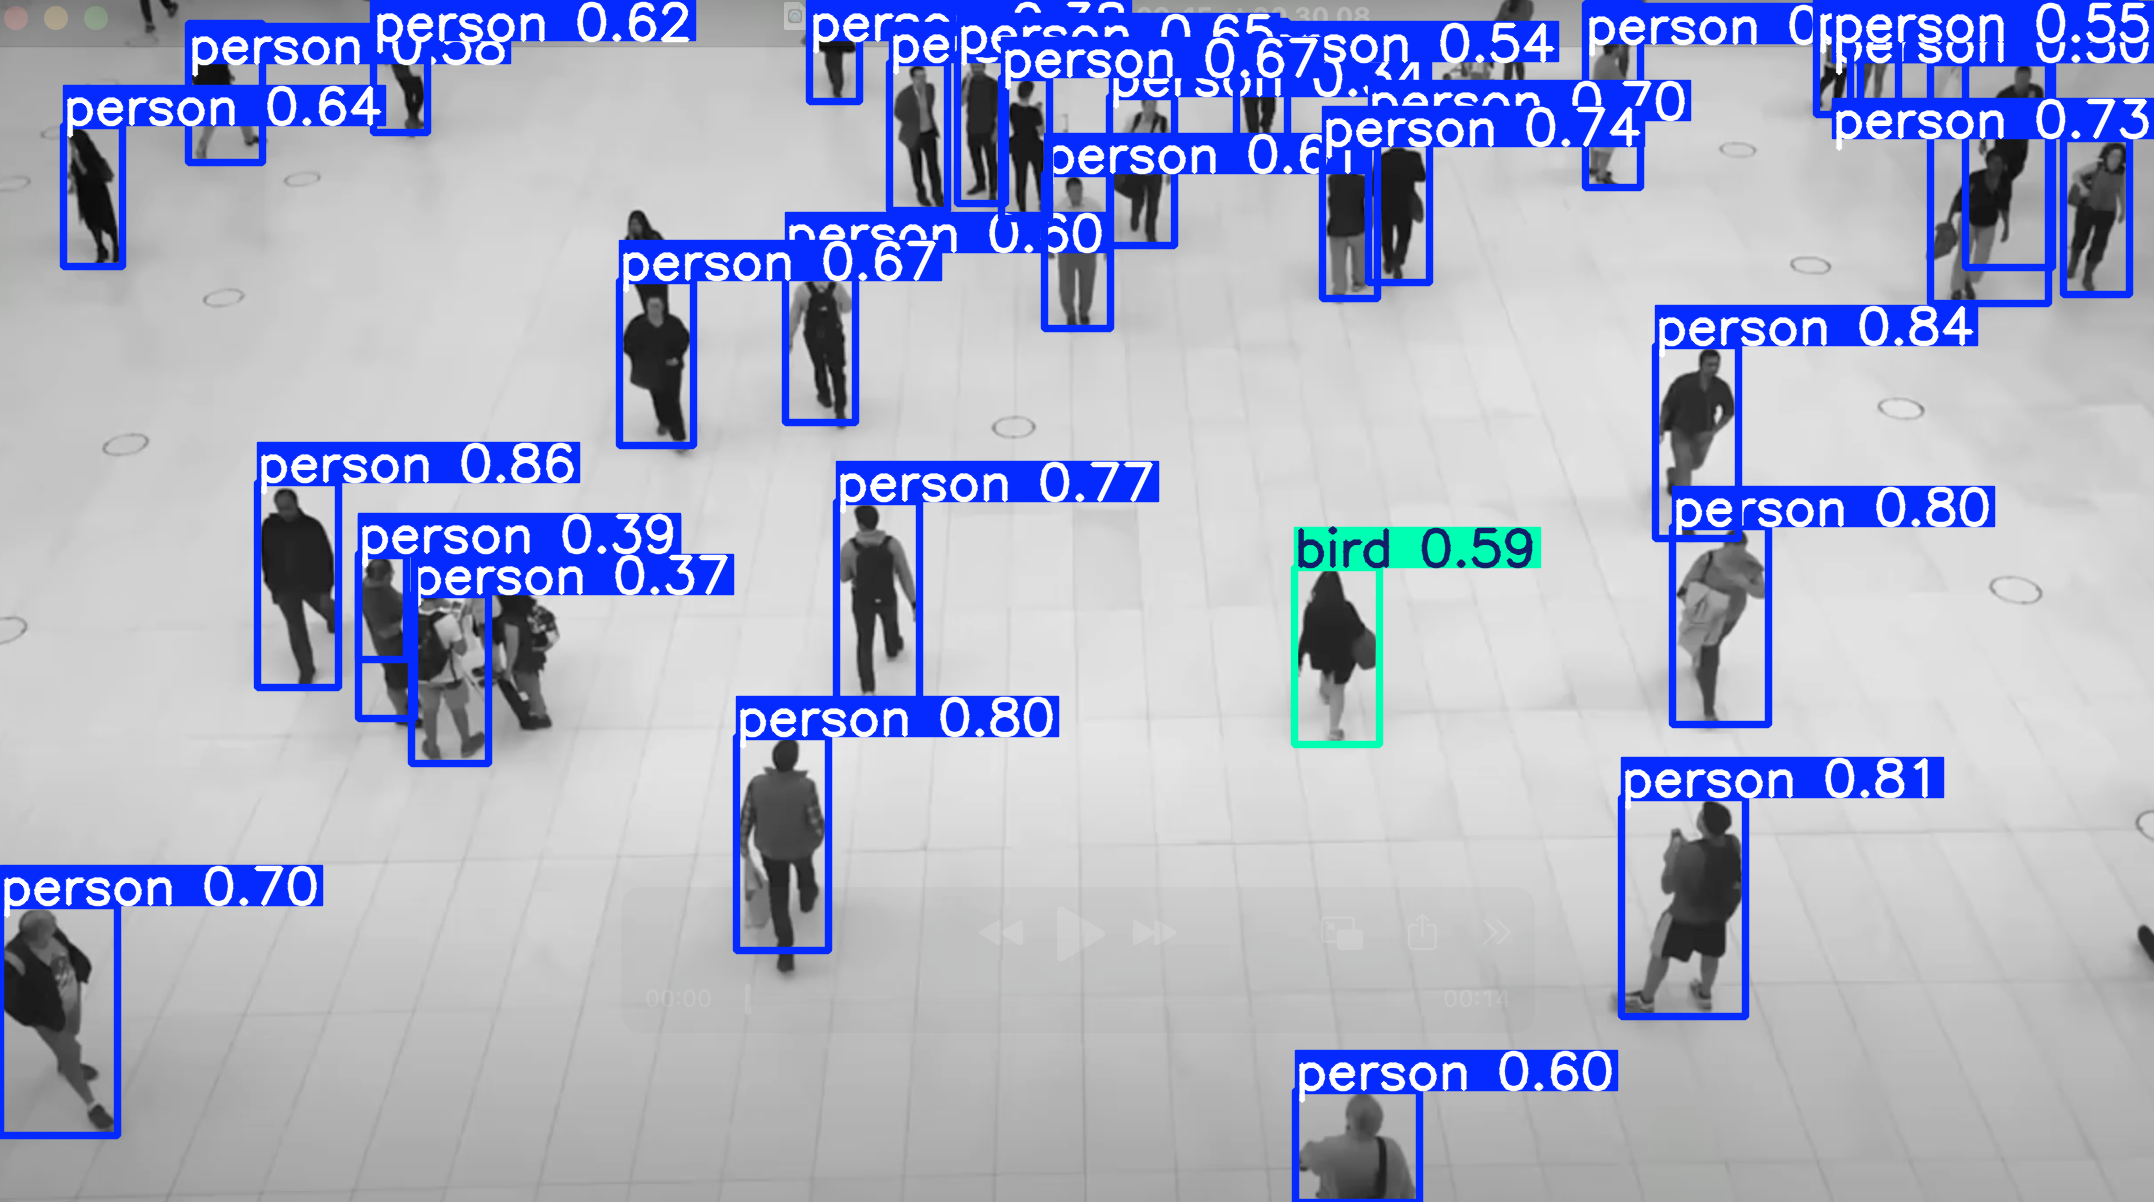

People detected: 31


In [ ]:
res = results[0]

from google.colab.patches import cv2_imshow
annotated = res.plot()
cv2_imshow(annotated)

person_count = sum(1 for cls in res.boxes.cls if int(cls) == 0)
print("People detected:", person_count)

In [ ]:
results2 = model(source="/content/drive/My Drive/crowd.mov", show=True)

WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()


WARNING ⚠️ 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/821) /content/drive/My Drive/crowd.mov: 384x640 35 persons, 1 bird, 52.0ms
video 1/1 (frame 2/821) /content/drive/My Drive/crowd.mov: 384x640 36 persons, 1 bird, 9.2ms
video 1/1 (frame 3/821) /content/drive/My Drive/crowd.mov: 384x640 35 persons, 1 bird, 6.4ms
video 1/1 (frame 4/821) /content/drive/My Drive/crowd.mov: 384x640 35 persons, 1 bird, 7.5ms
video 1/1

In [ ]:
from google.colab import files
files.download("/content/runs/detect/predict/crowd.mov")


FileNotFoundError: Cannot find file: /content/runs/detect/predict/crowd.mov

In [ ]:
results2 = model.predict(
    source="/content/drive/My Drive/crowd.mov",
    conf=0.4,
    save=True
)

!ls /content/runs/detect/predict/



WARNING ⚠️ 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/821) /content/drive/My Drive/crowd.mov: 384x640 26 persons, 1 bird, 8.3ms
video 1/1 (frame 2/821) /content/drive/My Drive/crowd.mov: 384x640 26 persons, 1 bird, 15.7ms
video 1/1 (frame 3/821) /content/drive/My Drive/crowd.mov: 384x640 29 persons, 10.8ms
video 1/1 (frame 4/821) /content/drive/My Drive/crowd.mov: 384x640 28 persons, 6.3ms
video 1/1 (frame 5/821) /content/drive/My Drive/crowd.mov: 384x640 29 persons, 12.2ms
video 1/1 (f

In [ ]:
import cv2
from ultralytics import YOLO
from google.colab.patches import cv2_imshow

model = YOLO("yolov8n.pt")
cap = cv2.VideoCapture("/content/drive/My Drive/crowd.mov")

frame_num = 0
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    results = model(frame)

    boxes = results[0].boxes
    person_count = sum(1 for cls in boxes.cls if int(cls) == 0)

    def crowd_status(count):
        if count < 20:
            return "🟢 Safe"
        elif count < 50:
            return "🟡 Moderate"
        else:
            return "🔴 Crowded - Risk of stampede"

    print(f"Frame {frame_num}: {person_count} persons → {crowd_status(person_count)}")
    frame_num += 1

cap.release()



0: 384x640 35 persons, 1 bird, 74.9ms
Speed: 17.7ms preprocess, 74.9ms inference, 315.8ms postprocess per image at shape (1, 3, 384, 640)
Frame 0: 35 persons → 🟡 Moderate

0: 384x640 36 persons, 1 bird, 8.8ms
Speed: 4.0ms preprocess, 8.8ms inference, 15.4ms postprocess per image at shape (1, 3, 384, 640)
Frame 1: 36 persons → 🟡 Moderate

0: 384x640 35 persons, 1 bird, 6.4ms
Speed: 3.1ms preprocess, 6.4ms inference, 15.0ms postprocess per image at shape (1, 3, 384, 640)
Frame 2: 35 persons → 🟡 Moderate

0: 384x640 35 persons, 1 bird, 11.6ms
Speed: 4.5ms preprocess, 11.6ms inference, 25.5ms postprocess per image at shape (1, 3, 384, 640)
Frame 3: 35 persons → 🟡 Moderate

0: 384x640 36 persons, 1 bird, 23.0ms
Speed: 3.0ms preprocess, 23.0ms inference, 29.7ms postprocess per image at shape (1, 3, 384, 640)
Frame 4: 36 persons → 🟡 Moderate

0: 384x640 34 persons, 1 bird, 10.5ms
Speed: 2.9ms preprocess, 10.5ms inference, 42.5ms postprocess per image at shape (1, 3, 384, 640)
Frame 5: 34 per

In [ ]:
import cv2
from ultralytics import YOLO

model = YOLO("yolov8n.pt")

cap = cv2.VideoCapture("/content/drive/My Drive/crowd.mov")

fps = int(cap.get(cv2.CAP_PROP_FPS))
width  = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

out = cv2.VideoWriter(
    "/content/crowd_processed.mov",
    cv2.VideoWriter_fourcc(*'mp4v'),
    fps,
    (width, height)
)

frame_num = 0
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    results = model(frame, verbose=False)

    boxes = results[0].boxes
    person_count = sum(1 for cls in boxes.cls if int(cls) == 0)

    def crowd_status(count):
        if count < 27:
            return "🟢 Safe"
        elif count < 33:
            return "🟡 Moderate"
        else:
            return "🔴 Crowded - Risk of stampede"

    status = crowd_status(person_count)

    annotated = results[0].plot()
    cv2.putText(
        annotated,
        f"Count: {person_count} | {status}",
        (20, 40),
        cv2.FONT_HERSHEY_SIMPLEX,
        1,
        (0, 0, 255),
        2
    )

    out.write(annotated)
    frame_num += 1

cap.release()
out.release()
print("✅ Processed video saved at /content/crowd_processed.mov")


✅ Processed video saved at /content/crowd_processed.mov


In [ ]:
from IPython.display import Video
Video("/content/crowd_processed.mov", embed=True, width=600, height=400)


In [ ]:
from google.colab import files
files.download("/content/crowd_processed.mov")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>